In [1]:
##Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs    
import seaborn as sns

(500, 2) (500,)


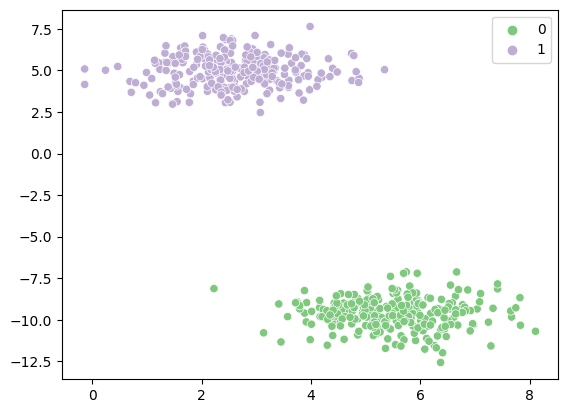

In [4]:
# Initializing our X and Y variables
X, Y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=10)

# Printing shape of X and Y
print(X.shape, Y.shape)

# Visualizing the dataset
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, palette='Accent')

# Displaying the plot
plt.show()

Epoch 0 Loss 0.1056
Epoch 10 Loss 0.0267
Epoch 20 Loss 0.0156
Epoch 30 Loss 0.0111
Epoch 40 Loss 0.0087
Epoch 50 Loss 0.0071
Epoch 60 Loss 0.0061
Epoch 70 Loss 0.0053
Epoch 80 Loss 0.0047
Epoch 90 Loss 0.0042


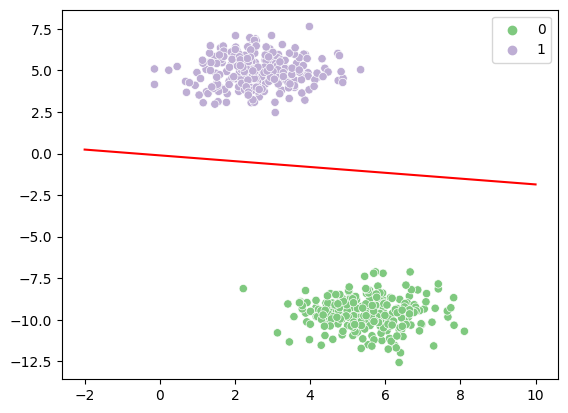

In [8]:
# Defining the sigmoid function
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

# Defining the predict, loss, update, and train functions
def predict(X, weights):
    # X -> m x (n+1) matrix and Weights -> (n+1) x 1 vector
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    return predictions

def loss(X, Y, weights):
    # Binary Cross Entropy/Log Loss
    Y_hat = predict(X, weights)
    cost = np.mean(-Y * np.log(Y_hat) - (1 - Y) * np.log(1 - Y_hat))
    return cost

def update(X, Y, weights, learning_rate):
    Y_hat = predict(X, weights)
    dw = np.dot(X.T, Y_hat - Y)
    m = X.shape[0]
    weights = weights - learning_rate * dw / float(m)
    return weights

def train(X, Y, learning_rate, maxEpochs=100):
    ones = np.ones((X.shape[0], 1))
    X = np.hstack((ones, X))
    weights = np.zeros(X.shape[1])
    for epoch in range(maxEpochs):
        weights = update(X, Y, weights, learning_rate)
        if epoch % 10 == 0:
            loss_val = loss(X, Y, weights)
            print("Epoch %d Loss %.4f" % (epoch, loss_val))
    return weights

# Generating the dataset
X, Y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=10)

# Training the logistic regression model
weights = train(X, Y, learning_rate=0.1, maxEpochs=100)

# Visualization
x1 = np.linspace(-2, 10, 10)
x2 = -(weights[0] + weights[1] * x1) / weights[2]
plt.plot(x1, x2, color='red')
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, palette='Accent')

# Displaying the plot
plt.show()
